In this script, we are going to calculate the free energy difference between two states.
State 0 has a Hamiltonian $H_0=(x+1.5)^2$ in one-dimensional space, and state 1 has a Hamiltonian $H_1=(x-1.5)^2$.
These two Hamiltonians have the same shape, but shifted by 3 units along the axis.
Therefore, the free energy difference between these two states is zero, which can be seen from
\begin{equation}
\Delta A=-\ln\frac{\int\limits_{-\infty}^{\infty} e^{-H_1(x)}dx}{\int\limits_{-\infty}^{\infty} e^{-H_0(x)}dx}=-\ln\frac{\int\limits_{-\infty}^{\infty} e^{-(x-2)^2}dx}{\int\limits_{-\infty}^{\infty} e^{-(x+2)^2}dx}=-\ln\frac{\int\limits_{-\infty}^{\infty} e^{-(x-2)^2}dx}{\int\limits_{-\infty}^{\infty} e^{-(y-2)^2}dy}=-\ln 1=0
\end{equation}

We will use Thermodynamic Integration to calculate the free energy difference. In the first step, we define a Hamiltonian $H(\lambda)$, which smoothly switchs from $H_0$ to $H_1$ with $\lambda$ increasing from 0 to 1. Probably the simplest one for $H(\lambda)$ is a linear combination of $H_0$ and $H_1$, i.e.
$$
H(\lambda)=(1-\lambda)H_0+\lambda H_1.
$$
You can easily find the gradient of H(\lambda) on $\lambda$, which is
$$
\frac{\partial H(\lambda)}{\partial \lambda}=H_1-H_0
$$
and will be used later.
The free energy associated with this Hamiltonian is $A(\lambda)$. Then the free energy change from $\lambda=0$ to $\lambda=1$ can be written as 
\begin{eqnarray}
\Delta A=&\int\limits_{0}^{1} \frac{\partial A(\lambda)}{\partial \lambda}d\lambda=\int\limits_{0}^{1} -\beta^{-1}\frac{\partial \ln Q(\lambda)}{\partial \lambda}d\lambda=\int\limits_{0}^{1} -\frac{\beta^{-1}}{Q(\lambda)}\frac{\partial Q(\lambda)}{\partial \lambda}d\lambda\\
=&\int\limits_{0}^{1} -\frac{\beta^{-1}}{Q(\lambda)}\frac{\partial \int e^{-\beta H(x,\lambda)}dx}{\partial \lambda}d\lambda=\int\limits_{0}^{1} \frac{\int \frac{\partial H(\lambda)}{\partial \lambda}e^{-\beta H(x,\lambda)}dx}{Q(\lambda)}d\lambda\\
=&\int\limits_0^1 \left<\frac{\partial H(\lambda)}{\partial \lambda}\right>_{\lambda}d\lambda\\
\end{eqnarray}
With the definition of $H(\lambda)$ above using the linear combination of $H_0$ and $H_1$, we have
$$
\Delta A=\int\limits_0^1 \left<H_1-H_0\right>_{\lambda}d\lambda.
$$
Therefore, the calculation of free energy difference becomes a integration in $\lambda$ space. Using the simplest integration method, the trapezoidal integration, it becomes
$$
\Delta A = \sum\limits_i \frac12 \left(\left<H_1-H_0\right>_{\lambda_i}+\left<H_1-H_0\right>_{\lambda_{i+1}}\right)\Delta \lambda
$$

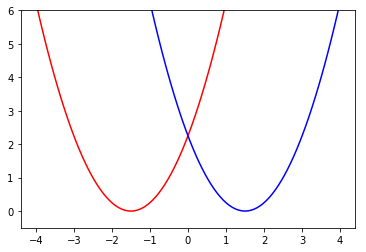

In [2]:
from math import *
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats
np.set_printoptions(precision=3)
def u0(x):
    return (x+1.5)**2
def u1(x):
    return (x-1.5)**2
x=np.linspace(-4,4,100)
y0=u0(x)
y1=u1(x)
plt.ylim(-.5, 6)
plt.plot(x,y0,'r',x,y1,'b')
plt.show()

In [ ]:
def ulmbd(lamb,x):
    return (1-lamb)*u0(x)+lamb*u1(x)

In [3]:
x=np.linspace(-4,4,100)
y0=ulmbd(0.0,x)
y1=ulmbd(0.1,x)
y2=ulmbd(0.2,x)
y5=ulmbd(0.5,x)
y8=ulmbd(0.8,x)
y9=ulmbd(0.9,x)
yN=ulmbd(1.0,x)
plt.ylim(-.5, 6)
plt.plot(x,y0,'r')
plt.plot(x,yN,'b')
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y5)
plt.plot(x,y8)
plt.plot(x,y9)
plt.show()

NameError: name 'ulmbd' is not defined

In [ ]:
def MCpropagator2(x0,dx,N,dN,ulmbd,lamb):
    count = 0
    x = np.empty(N)
    xcurrent = x0
    while count < N:
        innercount = 0
        while innercount < dN:
            rnd = np.random.uniform(0.,1.)
            if rnd<0.5:
                xtrial = xcurrent - dx
            else:
                xtrial = xcurrent + dx

            deltau = ulmbd(lamb,xtrial) - ulmbd(lamb,xcurrent)
            if deltau < 0:
                xcurrent = xtrial
            else:
                acceptanceratio = np.exp(-deltau)
                if acceptanceratio > np.random.uniform(0.0,1.0):
                    xcurrent = xtrial
                else:
                    xcurrent = xcurrent
            innercount = innercount + 1
        x[count] = xcurrent
        count = count + 1
    return x, count

def TI(x):
    du=np.zeros(x.size)
    du = u1(x)-u0(x)
    S = np.mean(du)
    varS = np.var(du)/x.size
    return S, varS

In [ ]:
dx = 0.01
N = 11000
dN = 1600
dlambda = 0.1
lambs = np.arange(0.0,1.,dlambda)
lambs = np.append(lambs,[1.0])
Ns = N//len(lambs)
dAdl = np.zeros(len(lambs))
vardAdl = np.zeros(len(lambs))
i = 0
for i in range(len(lambs)):
    x0 = -1.5 + 3.0*i*dlambda
    x = np.empty(Ns)
    x, count = MCpropagator2(x0,dx,Ns,dN,ulmbd,lambs[i])
#    print('Number of samples generated:%8d for lambda= %5.2f' %(count,lambs[i]))
    prob, bins, patches = plt.hist(x, bins=50, density=True)
    mean = np.mean(x)
    variance = np.var(x)
    npdf = scipy.stats.norm.pdf(bins,mean,variance)
    plt.plot(bins, npdf, '--')
    dAdl[i], vardAdl[i] = TI(x)

dA=0.0
for i in range(len(lambs)-1):
    print('The free energy difference from lambda %d to lambda %d is %8.2f +- %5.2f' % (i,i+1,0.5*dlambda*(dAdl[i]+dAdl[i+1]), 0.5*dlambda*np.sqrt(vardAdl[i]+vardAdl[i+1])))
    dA += 0.5*dlambda*(dAdl[i]+dAdl[i+1])

vardA=(0.5*dlambda)**2*(vardAdl[0]+vardAdl[-1])
for i in range(1,len(lambs)-1):
    vardA += dlambda**2*vardAdl[i]
print('')
print('The total free energy difference is %8.2f +- %5.2f' %(dA,np.sqrt(vardA)))
plt.show()